In [1]:
#!/usr/bin/env python

"""MXGSTGF_PulseHeightSpectrum_test_Data_read_into_db.py: read raw data in database"""


__author__ 		= "Gareth Murphy"
__copyright__ 	= "Copyright 2016, ASDC, DTU Space"
__credits__ 	= ["spacepy, bitstring, textwrap, numpy"]
__license__ 	= "XXX"
__version__ 	= "0.0.1"
__maintainer__ 	= "Gareth Murphy"
__email__ 		= "gmurphy@space.dtu.dk"
__status__ 		= "Working version, finds and reads data correctly "

import os, sys


home="/Users/garmu/Dropbox/"
#home="/Users/gmurphy/Dropbox/"

proj_path = home+"/asdc/web/"

proj_path = home+"/myenv/mysite/"
# This is so Django knows where to find stuff.
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "mysite.settings")
sys.path.append(proj_path)

# This is so my local_settings.py gets loaded.
os.chdir(proj_path)

# This is so models get loaded.
from django.core.wsgi import get_wsgi_application
application = get_wsgi_application()


from asim.models import * 
    

In [2]:
mylist=['10' ,'13' ,'14' ,'22' ,'31' ,'33' ,'35'  ]
mylist=['10'   ]

for tag in mylist:

    fname='PFM_20160513_0912_raw.txt'

    path=home+'/PFM_20160513_0912/Section_5_3/raw/'


    #fname='PFM_20160513_0912_raw.txt'
    i=0

    import re


    MXGS              ='80'
    GROUND            ='92'
    SCIENCE_DATA      ='02'
    INITIAL_TGF_TM    ='a0'
    CONTINU_TGF_TM    ='a1'
    INITIAL_BACKGR_TM ='a2'
    CONTINU_BACKGR_TM ='a3'
    INITIAL_PULSE_TM  ='a4'
    CONTINU_PULSE_TM  ='a5'
    INITIAL_SAMP_TM   ='a6'
    CONTINU_SAMP_TM   ='a7'
    INITIAL_AUR_TM    ='a8'
    CONTINU_AUR_TM    ='a9'

    regex = re.compile(MXGS+GROUND+SCIENCE_DATA+'a[45]....00'+tag)



    datalist=[]

    masterdata=[]
    total=0
    import textwrap

    with open (path+fname) as f:    
        for line in f:
            if re.match(regex,line):
                datalist.append(line)
                a=datalist[i]
                dl=textwrap.wrap(a, 4)

                from bitstring import Bits

                f = open('file'+str(i).zfill(3)+'.ccsds', 'wb')
                Bits('0x'+line).tofile(f)
                f.close()


                total =  total + hex2int (a[8:12])
                if ( i > 0) :
                # delete first 14 bytes/28 hex (Continuation Header)
                    dl=dl[8:]
                i=i+1
                masterdata.extend(dl)

    x=MXGSPulseHeightSpectrumObservation()
    x.hexstring_to_db(masterdata)
    print 'obs id' , x.observation_id
    x.save()

12306
obs id 0010


In [3]:
def read_cdf(fname):
    from spacepy import pycdf
    pycdf.lib.set_backward(False)

    cdf = pycdf.CDF(fname)

    print(cdf.keys())


    #cdf['pulse_height_spectra'][4]

    data = cdf['pulse_height_spectra'][...] # don't forget the [...]
    cdf_dat = cdf.copy()
    cdf_dat.keys()
    print cdf_dat.keys()
    cdf.close()
    return data

fname='/Users/garmu/Dropbox/myenv/mysite/pulseheightspectrum_809202a40010.cdf'


data=read_cdf(fname)

['pulse_height_spectra', 'bgo_dau_pulse_height_spectra', 'czt_dau_pulse_height_spectra', 'data_provided', 'detector_counts', 'end_dau_bgo_1_int_tmon_chan1', 'end_dau_bgo_1_int_tmon_chan2', 'end_dau_bgo_1_int_tmon_chan3', 'end_dau_bgo_1_int_tmon_chan4', 'end_dau_bgo_2_int_tmon_chan1', 'end_dau_bgo_2_int_tmon_chan2', 'end_dau_bgo_2_int_tmon_chan3', 'end_dau_bgo_2_int_tmon_chan4', 'end_dau_bgo_3_int_tmon_chan1', 'end_dau_bgo_3_int_tmon_chan2', 'end_dau_bgo_3_int_tmon_chan3', 'end_dau_bgo_3_int_tmon_chan4', 'end_dau_bgo_4_int_tmon_chan1', 'end_dau_bgo_4_int_tmon_chan2', 'end_dau_bgo_4_int_tmon_chan3', 'end_dau_bgo_4_int_tmon_chan4', 'integration_period', 'observation_id', 'start_dau_bgo_1_int_tmon_chan1', 'start_dau_bgo_1_int_tmon_chan2', 'start_dau_bgo_1_int_tmon_chan3', 'start_dau_bgo_1_int_tmon_chan4', 'start_dau_bgo_2_int_tmon_chan1', 'start_dau_bgo_2_int_tmon_chan2', 'start_dau_bgo_2_int_tmon_chan3', 'start_dau_bgo_2_int_tmon_chan4', 'start_dau_bgo_3_int_tmon_chan1', 'start_dau_bgo_3_

In [4]:
print len(data)

12288


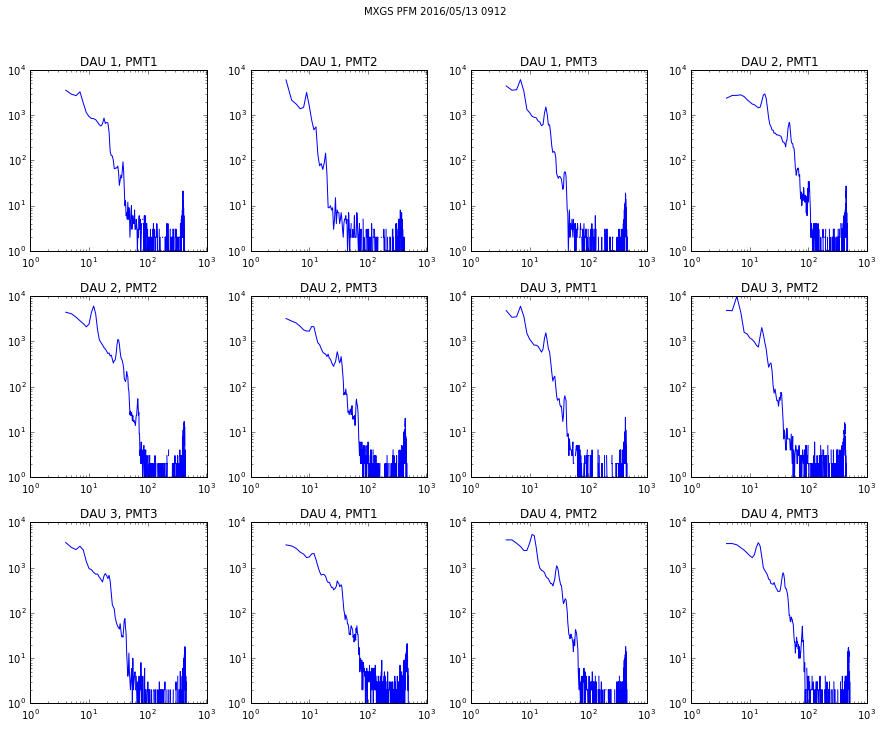

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

dat=np.reshape(data, [12,1024])

#set(plt.gca,'xscale','log')
#for i in range (0,12):
#    plt.loglog (dat[i])
title=    'MXGS PFM 2016/05/13 0912'
fig, axs = plt.subplots(3,4, figsize=(15, 11), facecolor='w', edgecolor='k' )
fig.subplots_adjust(hspace = 0.25, wspace=.25, bottom=0.1)
#fig.canvas.set_window_title()


axs = axs.ravel()

dau=[1,1,1,2,2,2,3,3,3,4,4,4]
pmt=[1,2,3,1,2,3,1,2,3,1,2,3]


for i in range(12):

    axs[i].loglog(dat[i])
    axs[i].set_title('DAU '+str(dau[i])  + ', PMT'+ str(pmt[i]) ) 
    axs[i].set_xlim(xmax=1024)

fig.suptitle(title)

plt.savefig('pulseheight'+str(x.observation_id)+'.png')